# DIGIT RECOGNITION

**Name:**AI 0014

**Submission date:** 16.1.18

# *Introduction*

The task was to analyze a set of images of hand written digits and use a CNN for predicting its values using the dataset provided

# *Step by step procedure*

*Importing the libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import keras
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

Using TensorFlow backend.


*Loading the train and test set*

In [2]:
train = pd.read_csv("train (1).csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
target=train["label"].values
print(target)
train1=train.drop("label",axis=1)


[1 0 1 ..., 7 6 9]


In [5]:
train1 = train1.values.astype('float32')
target1=target.astype("int32")
test1=test.values.astype("float32")

*Reshaping the data for visualization*

In [6]:
train1=train1.reshape(train1.shape[0],28,28)
test1=test1.reshape(test1.shape[0],28,28)

Train data:


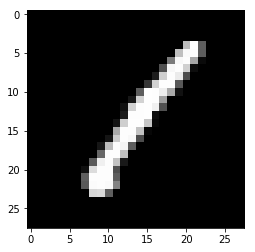

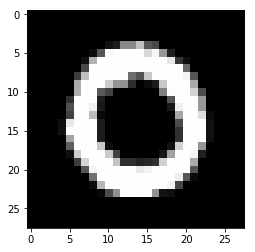

Test data:


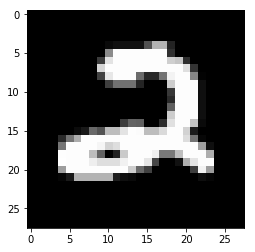

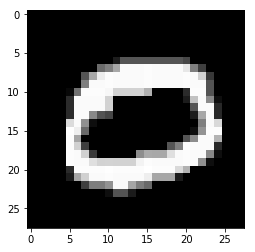

In [7]:
print("Train data:")
for i in range(0,2):
    plt.imshow(train1[i],cmap=plt.get_cmap('gray'))
    plt.show()
print("Test data:")
for i in range(0,2):
    plt.imshow(test1[i],cmap=plt.get_cmap('gray'))
    plt.show()    

*Reshaping the data for cnn*

In [8]:
train1=train1.reshape(train1.shape[0],28,28,1)
test1=test1.reshape(test1.shape[0],28,28,1)

In [9]:
train1/=255
test1/=255

In [10]:
target1=np_utils.to_categorical(target1,10)

In [11]:
num_classes=10

*CNN model*

In [12]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

*Compiling and training the network*

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.fit(train1, target1,
          batch_size=16,validation_split=0.2, nb_epoch=5)


C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 203s 6ms/step - loss: 0.2745 - acc: 0.9160 - val_loss: 0.0809 - val_acc: 0.9739
Epoch 2/5
33600/33600 [==============================] - 201s 6ms/step - loss: 0.1118 - acc: 0.9672 - val_loss: 0.0611 - val_acc: 0.9794
Epoch 3/5
33600/33600 [==============================] - 201s 6ms/step - loss: 0.0884 - acc: 0.9740 - val_loss: 0.0503 - val_acc: 0.9833
Epoch 4/5
33600/33600 [==============================] - 205s 6ms/step - loss: 0.0753 - acc: 0.9783 - val_loss: 0.0470 - val_acc: 0.9856
Epoch 5/5
33600/33600 [==============================] - 201s 6ms/step - loss: 0.0683 - acc: 0.9797 - val_loss: 0.0423 - val_acc: 0.9864


*Predicting the target of the test data*

In [14]:
y=model.predict(test1)

In [15]:
y

array([[  1.57994876e-07,   1.45165284e-08,   9.99997616e-01, ...,
          9.46291948e-07,   6.93654385e-07,   1.06326453e-07],
       [  9.99959350e-01,   7.33357197e-09,   1.02269962e-06, ...,
          4.04803541e-06,   3.35158461e-07,   2.01283683e-06],
       [  1.21282525e-07,   1.36541573e-07,   1.48513107e-06, ...,
          1.89469811e-05,   9.28878653e-05,   9.99724567e-01],
       ..., 
       [  6.89773655e-11,   8.72666495e-10,   1.81714022e-08, ...,
          9.24985670e-08,   2.78045356e-08,   4.00588704e-07],
       [  5.96430425e-07,   7.75879130e-08,   9.45529450e-08, ...,
          8.44441165e-05,   5.99388386e-06,   9.99503016e-01],
       [  7.80263605e-08,   1.03974926e-08,   9.99995589e-01, ...,
          5.90290803e-08,   3.86314514e-06,   9.43704848e-08]], dtype=float32)

In [16]:
predict=[]
for i in range(len(y)):
    predict.append([np.argmax(y[i])])
    

In [17]:
prediction_df=pd.DataFrame((predict),columns=["Label"])
index=np.array(range(1,len(predict)+1))
index_df=pd.DataFrame(index,columns=["ImageId"])
prediction_df=pd.concat([index_df,prediction_df],axis=1)

In [18]:
prediction_df.to_csv("Result.csv",index=None)

*Kaggle score*

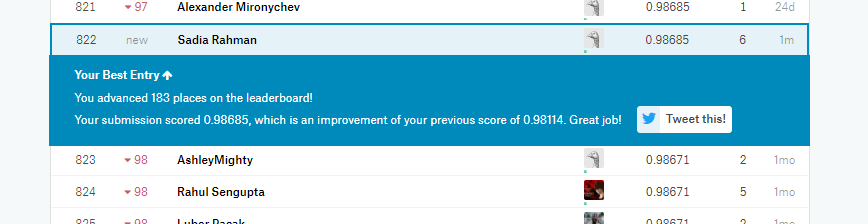

In [19]:
from PIL import Image
IM=Image.open("Final score.png")
IM